
image 1/1 /home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/test_img/stop1.png: 480x640 1 speed_limit_50, 147.1ms
Speed: 2.1ms preprocess, 147.1ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)


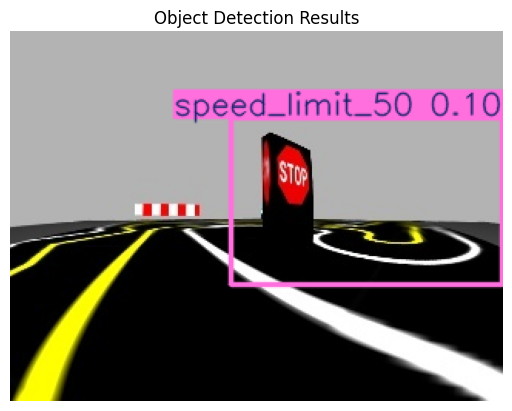

Object detection complete and image displayed!


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2 # Often useful for image manipulation, though not strictly needed for just plotting

# 모델 로드
# Make sure this path is correct and accessible
model = YOLO("/home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/traffic_sign_detect.pt")

# 예측 실행 (저장 없이)
# 'source' can be a path to an image, a video, a list of paths, or even a webcam stream
results = model.predict(
    source="/home/kiwi/github_package/turtlebot-autonomy/subtask/detect_signs/test_img/stop1.png",
    save=False,  # Set to True if you want to save the annotated image to disk
    conf=0.1     # Confidence threshold: only show predictions with confidence > 0.3
)

# 결과 이미지 가져오기
# results[0].plot() returns a numpy array (image) with annotations
result_img = results[0].plot() # This image is in BGR format

# matplotlib으로 시각화 (BGR → RGB 변환 필요)
# Convert BGR (OpenCV/YOLO default) to RGB (Matplotlib default)
plt.imshow(result_img[..., ::-1])
plt.axis("off")  # Hide the axes for a cleaner image display
plt.title("Object Detection Results") # Optional: Add a title
plt.show()

print("Object detection complete and image displayed!")